# Análise da População Prisional de Minas Gerais (2017–2024)

## Contexto
Este projeto analisa dados da população prisional do estado de Minas Gerais no período de 2017 a 2024, com foco em características como sexo e escolaridade. A análise tem caráter exploratório e busca identificar padrões e tendências ao longo do tempo.
Dados extraídos de: https://www.seguranca.mg.gov.br/index.php/component/sppagebuilder/page/266

## Objetivo
Responder às seguintes perguntas:
- Como evoluiu a população prisional ao longo dos anos?
- Qual a distribuição por sexo?
- Qual o nível de escolaridade predominante da população prisional?


In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/content/drive/MyDrive/Notebooks_projetos/Dados Abertos_Pop_Pris_Sexo_Escolaridade_Jan_2017_Jun_2024.xlsx')
df.head(30)

,COD_OBSERVATORIO,NOME_ESTAB_PRISIONAL,COD_INSTITUICAO,INSTITUICAO,COD_IBGE,MUNICIPIO,COD_RISP,RISP,COD_SEXO,SEXO_NA_ADMISSAO,COD_ESCOLARIDADE_NA_ADMISSAO,ESCOLARIDADE_NA_ADMISSAO,ANO,MES_NUMERICO,CONTAGEM_IPL
0,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,1,Analfabeto,2017,1,0
1,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,1,Analfabeto,2017,1,0
2,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,1,Analfabeto,2017,1,0
3,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,1,Analfabeto,2017,1,0
4,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,2,Semi-Alfabetizado,2017,1,0
5,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,2,Semi-Alfabetizado,2017,1,0
6,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,2,Semi-Alfabetizado,2017,1,0
7,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,2,Semi-Alfabetizado,2017,1,1
8,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,2,Semi-Alfabetizado,2017,1,1
9,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,2,Semi-Alfabetizado,2017,1,0


## Entendimento inicial dos dados

Nesta etapa, realizo uma inspeção inicial do conjunto de dados para:
- Entender sua dimensão.
- Identificar tipos de variáveis.
- Verificar dados ausentes ou inconsistentes.
- Garantir que não há duplicidades que prejudiquem a análise.


In [64]:
#Etapa1 - Inspecionando o dataframe:
#Verificando número de linhas e colunas:
df.shape

(328773, 15)

In [65]:
#Verificando tipo de dados:
df.dtypes

,0
COD_OBSERVATORIO,int64
NOME_ESTAB_PRISIONAL,object
COD_INSTITUICAO,int64
INSTITUICAO,object
COD_IBGE,int64
MUNICIPIO,object
COD_RISP,int64
RISP,object
COD_SEXO,int64
SEXO_NA_ADMISSAO,object


In [66]:
#verificando se há dados nulos:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328773 entries, 0 to 328772
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   COD_OBSERVATORIO              328773 non-null  int64 
 1   NOME_ESTAB_PRISIONAL          328773 non-null  object
 2   COD_INSTITUICAO               328773 non-null  int64 
 3   INSTITUICAO                   328773 non-null  object
 4   COD_IBGE                      328773 non-null  int64 
 5   MUNICIPIO                     328773 non-null  object
 6   COD_RISP                      328773 non-null  int64 
 7   RISP                          328773 non-null  object
 8   COD_SEXO                      328773 non-null  int64 
 9   SEXO_NA_ADMISSAO              328773 non-null  object
 10  COD_ESCOLARIDADE_NA_ADMISSAO  328773 non-null  int64 
 11  ESCOLARIDADE_NA_ADMISSAO      328773 non-null  object
 12  ANO                           328773 non-null  int64 
 13 

In [67]:
df.describe(include='all')

,COD_OBSERVATORIO,NOME_ESTAB_PRISIONAL,COD_INSTITUICAO,INSTITUICAO,COD_IBGE,MUNICIPIO,COD_RISP,RISP,COD_SEXO,SEXO_NA_ADMISSAO,COD_ESCOLARIDADE_NA_ADMISSAO,ESCOLARIDADE_NA_ADMISSAO,ANO,MES_NUMERICO,CONTAGEM_IPL
count,328773.000000,328773,328773.000000,328773,328773.000000,328773,328773.000000,328773,328773.000000,328773,328773.000000,328773,328773.000000,328773.000000,328773.000000
unique,NaN,268,NaN,2,NaN,188,NaN,19,NaN,2,NaN,13,NaN,NaN,NaN
top,NaN,Penitenciária Prof. Aluízio Ignácio de Oliveira,NaN,DEPEN,NaN,Ribeirão das Neves,NaN,12ª RISP - Ipatinga,NaN,Masculino,NaN,1.Grau Incompleto,NaN,NaN,NaN
freq,NaN,2626,NaN,286254,NaN,11245,NaN,28882,NaN,253692,NaN,51110,NaN,NaN,NaN
mean,42693.587959,NaN,4.258653,NaN,313780.325088,NaN,9.558595,NaN,0.771633,NaN,14.404553,NaN,2020.240008,4.851527,18.775137
std,6681.311569,NaN,0.671123,NaN,2139.980429,NaN,5.098901,NaN,0.419781,NaN,29.346173,NaN,2.211549,3.824150,67.361858
min,40002.000000,NaN,4.000000,NaN,310020.000000,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,2017.000000,1.000000,0.000000
25%,40074.000000,NaN,4.000000,NaN,311910.000000,NaN,5.000000,NaN,1.000000,NaN,3.000000,NaN,2018.000000,1.000000,1.000000
50%,40132.000000,NaN,4.000000,NaN,313900.000000,NaN,10.000000,NaN,1.000000,NaN,5.000000,NaN,2020.000000,4.000000,3.000000
75%,40200.000000,NaN,4.000000,NaN,315460.000000,NaN,14.000000,NaN,1.000000,NaN,7.000000,NaN,2022.000000,8.000000,11.000000


In [68]:
#Verificando se há dados ausentes:
df.isna().sum()

,0
COD_OBSERVATORIO,0
NOME_ESTAB_PRISIONAL,0
COD_INSTITUICAO,0
INSTITUICAO,0
COD_IBGE,0
MUNICIPIO,0
COD_RISP,0
RISP,0
COD_SEXO,0
SEXO_NA_ADMISSAO,0


In [69]:
df.columns

Index(['COD_OBSERVATORIO', 'NOME_ESTAB_PRISIONAL', 'COD_INSTITUICAO',
       'INSTITUICAO', 'COD_IBGE', 'MUNICIPIO', 'COD_RISP', 'RISP', 'COD_SEXO',
       'SEXO_NA_ADMISSAO', 'COD_ESCOLARIDADE_NA_ADMISSAO',
       'ESCOLARIDADE_NA_ADMISSAO', 'ANO', 'MES_NUMERICO', 'CONTAGEM_IPL'],
      dtype='object')

In [70]:
#verificando duplicatas:
df.duplicated().sum()

np.int64(44146)

In [71]:
df = df.drop_duplicates()

In [72]:
##Foram identificadas linhas duplicadas no conjunto de dados.
##Essas duplicatas foram removidas para evitar distorções nas análises estatísticas e nos gráficos.
##Este é o número de dados após a retirada das duplicações:
print(f"Número de registros após limpeza: {len(df)}")

Número de registros após limpeza: 284627


In [73]:
#padronizando o nome das colunas:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [74]:
df.columns

Index(['cod_observatorio', 'nome_estab_prisional', 'cod_instituicao',
       'instituicao', 'cod_ibge', 'municipio', 'cod_risp', 'risp', 'cod_sexo',
       'sexo_na_admissao', 'cod_escolaridade_na_admissao',
       'escolaridade_na_admissao', 'ano', 'mes_numerico', 'contagem_ipl'],
      dtype='object')

In [75]:
df.head(10)  # mostra as 10 primeiras linhas

,cod_observatorio,nome_estab_prisional,cod_instituicao,instituicao,cod_ibge,municipio,cod_risp,risp,cod_sexo,sexo_na_admissao,cod_escolaridade_na_admissao,escolaridade_na_admissao,ano,mes_numerico,contagem_ipl
0,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,1,Analfabeto,2017,1,0
4,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,2,Semi-Alfabetizado,2017,1,0
7,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,2,Semi-Alfabetizado,2017,1,1
13,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,3,1.Grau Incompleto,2017,1,0
15,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,3,1.Grau Incompleto,2017,1,2
16,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,3,1.Grau Incompleto,2017,1,1
17,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,3,1.Grau Incompleto,2017,1,6
19,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,3,1.Grau Incompleto,2017,1,4
24,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,4,1.Grau Completo,2017,1,0
26,40159,Anexo Prisao Civil Ceresp Gameleira,4,DEPEN,310620,Belo Horizonte,1,01ª RISP - Belo Horizonte,1,Masculino,4,1.Grau Completo,2017,1,1


In [76]:
#verificando outliers:
df_desc = df.describe()
df_desc

,cod_observatorio,cod_instituicao,cod_ibge,cod_risp,cod_sexo,cod_escolaridade_na_admissao,ano,mes_numerico,contagem_ipl
count,284627.000000,284627.000000,284627.000000,284627.000000,284627.000000,284627.000000,284627.000000,284627.000000,284627.000000
mean,42746.885485,4.264016,313786.992604,9.569644,0.761505,13.908522,2020.205146,5.448903,21.485702
std,6739.840225,0.677000,2138.501808,5.098797,0.426164,28.612518,2.194741,3.772886,72.009122
min,40002.000000,4.000000,310020.000000,1.000000,0.000000,1.000000,2017.000000,1.000000,0.000000
25%,40074.000000,4.000000,311930.000000,5.000000,1.000000,3.000000,2018.000000,2.000000,1.000000
50%,40132.000000,4.000000,313900.000000,10.000000,1.000000,5.000000,2020.000000,5.000000,4.000000
75%,40201.000000,4.000000,315460.000000,14.000000,1.000000,7.000000,2022.000000,9.000000,14.000000
max,60066.000000,6.000000,317200.000000,19.000000,1.000000,99.000000,2024.000000,12.000000,1422.000000


In [77]:
outliers = {}

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    outliers[col] = outlier_count

# Mostrar resultado
for col, count in outliers.items():
    print(f"{col}: {count} outliers")

cod_observatorio: 37573 outliers
cod_instituicao: 37573 outliers
cod_ibge: 0 outliers
cod_risp: 0 outliers
cod_sexo: 67882 outliers
cod_escolaridade_na_admissao: 28777 outliers
ano: 0 outliers
mes_numerico: 0 outliers
contagem_ipl: 36287 outliers


In [78]:
df['data_completa'] = pd.to_datetime(df['ano'].astype(str) + '-' + df['mes_numerico'].astype(str) + '-01', errors='coerce')

df['ANO'] = df['data_completa'].dt.year
df['MES'] = df['data_completa'].dt.month
df['ANO_MES'] = df['data_completa'].dt.to_period('M')

## Evolução da população prisional ao longo do tempo

Nesta análise, observo como a população prisional se comportou entre 2017 e 2024,
buscando identificar tendências de crescimento, queda ou estabilidade.

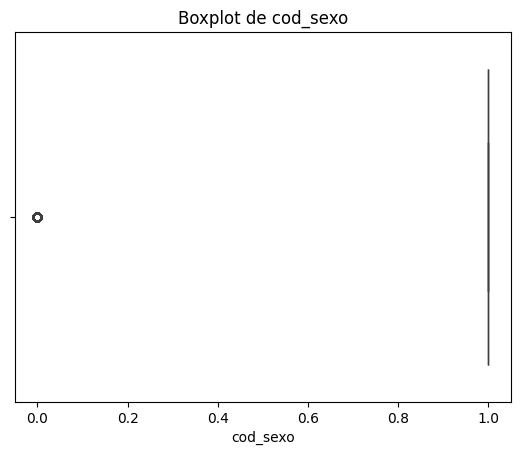

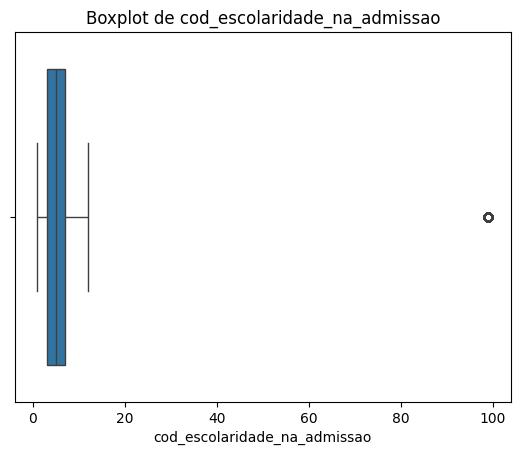

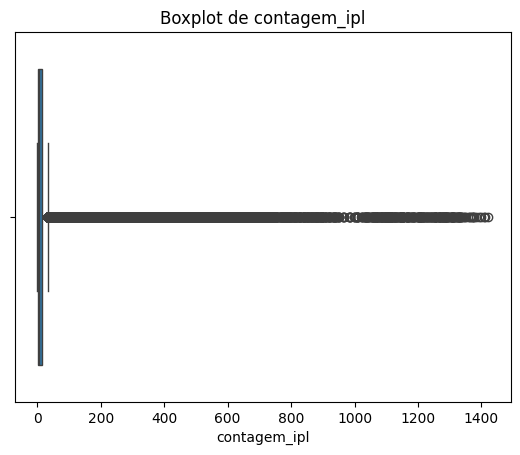

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['cod_sexo', 'cod_escolaridade_na_admissao', 'contagem_ipl']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


In [80]:
#filtrar e remover outliers:
## iqr = Q3 - Q1
df_desc.loc["IQR"] = df_desc.loc["75%"] - df_desc.loc["25%"]

df_desc

,cod_observatorio,cod_instituicao,cod_ibge,cod_risp,cod_sexo,cod_escolaridade_na_admissao,ano,mes_numerico,contagem_ipl
count,284627.000000,284627.000000,284627.000000,284627.000000,284627.000000,284627.000000,284627.000000,284627.000000,284627.000000
mean,42746.885485,4.264016,313786.992604,9.569644,0.761505,13.908522,2020.205146,5.448903,21.485702
std,6739.840225,0.677000,2138.501808,5.098797,0.426164,28.612518,2.194741,3.772886,72.009122
min,40002.000000,4.000000,310020.000000,1.000000,0.000000,1.000000,2017.000000,1.000000,0.000000
25%,40074.000000,4.000000,311930.000000,5.000000,1.000000,3.000000,2018.000000,2.000000,1.000000
50%,40132.000000,4.000000,313900.000000,10.000000,1.000000,5.000000,2020.000000,5.000000,4.000000
75%,40201.000000,4.000000,315460.000000,14.000000,1.000000,7.000000,2022.000000,9.000000,14.000000
max,60066.000000,6.000000,317200.000000,19.000000,1.000000,99.000000,2024.000000,12.000000,1422.000000
IQR,127.000000,0.000000,3530.000000,9.000000,0.000000,4.000000,4.000000,7.000000,13.000000


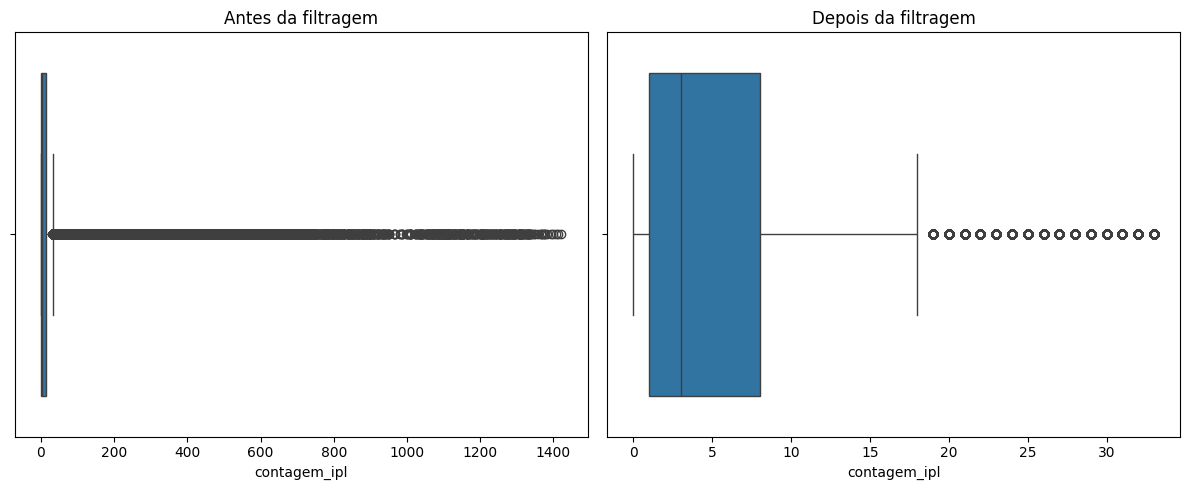

In [81]:
Q1 = df['contagem_ipl'].quantile(0.25)
Q3 = df['contagem_ipl'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtrado = df[(df['contagem_ipl'] >= lower_bound) & (df['contagem_ipl'] <= upper_bound)]

# Comparando antes e depois
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x=df['contagem_ipl'], ax=axes[0])
axes[0].set_title('Antes da filtragem')

sns.boxplot(x=df_filtrado['contagem_ipl'], ax=axes[1])
axes[1].set_title('Depois da filtragem')

plt.tight_layout()
plt.show()

In [117]:
crescimento_df.dtypes


,0
Admissoes,int64
Crescimento_%,float64


In [118]:
# visualizando distribuições com histogramas para ter intuição quanto a outliers
crescimento_df['Crescimento_%'] = pd.to_numeric(
    crescimento_df['Crescimento_%'],
    errors='coerce'
)


In [119]:
# Removendo ano incompleto (2024) da análise de crescimento
df_analise = df[df['ANO'] < 2024]

admissoes_ano = df_analise.groupby('ANO')['contagem_ipl'].sum()

crescimento_percentual = admissoes_ano.pct_change() * 100

crescimento_df = pd.DataFrame({
    'Admissoes': admissoes_ano,
    'Crescimento_%': crescimento_percentual.round(2)
})

crescimento_df


,Admissoes,Crescimento_%
ANO,,
2017,823019,NaN
2018,890063,8.15
2019,903006,1.45
2020,776083,-14.06
2021,766357,-1.25
2022,784292,2.34
2023,782217,-0.26


In [113]:
# Removendo ano incompleto (2024) da análise de crescimento
df_analise = df[df['ANO'] < 2024]

admissoes_ano = df_analise.groupby('ANO')['contagem_ipl'].sum()

crescimento_percentual = admissoes_ano.pct_change() * 100

crescimento_df = pd.DataFrame({
    'Admissoes': admissoes_ano,
    'Crescimento_%': crescimento_percentual.round(2)
})

crescimento_df


crescimento_df


,Admissoes,Crescimento_%
ANO,,
2017,823019,NaN
2018,890063,8.15
2019,903006,1.45
2020,776083,-14.06
2021,766357,-1.25
2022,784292,2.34
2023,782217,-0.26


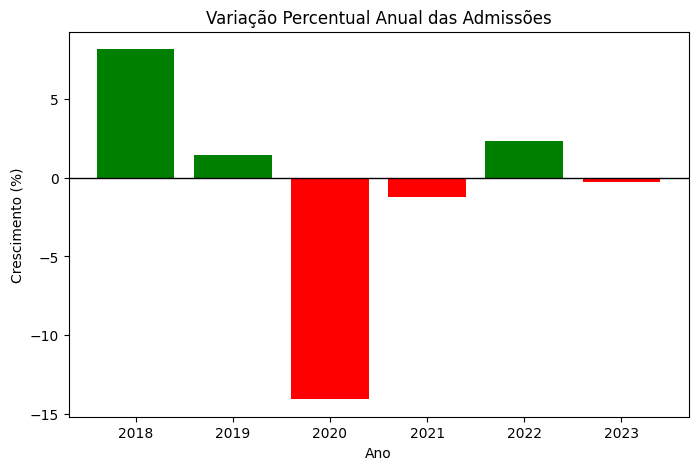

In [120]:
plt.figure(figsize=(8,5))

valores = crescimento_df['Crescimento_%'].astype(float)

plt.bar(
    crescimento_df.index,
    valores,
    color=['green' if x > 0 else 'red' for x in valores]
)

plt.axhline(0, color='black', linewidth=1)
plt.title('Variação Percentual Anual das Admissões')
plt.ylabel('Crescimento (%)')
plt.xlabel('Ano')

plt.show()


## Escolaridade da população prisional

Aqui analiso o nível de escolaridade da população prisional,
buscando identificar o grau de acesso à educação entre as pessoas privadas de liberdade.


In [85]:
print(df['escolaridade_na_admissao'].value_counts())

escolaridade_na_admissao
1.Grau Incompleto      45267
2.Grau Incompleto      35619
1.Grau Completo        35112
2.Grau Completo        34643
Semi-Alfabetizado      31989
Sem Informação         28777
Analfabeto             26813
Superior Incompleto    21234
Superior Completo      20146
Pós-graduado            3784
Mestrado                 711
Doutorado                531
Pos Doutorado              1
Name: count, dtype: int64


In [86]:
print(df.columns.tolist())

['cod_observatorio', 'nome_estab_prisional', 'cod_instituicao', 'instituicao', 'cod_ibge', 'municipio', 'cod_risp', 'risp', 'cod_sexo', 'sexo_na_admissao', 'cod_escolaridade_na_admissao', 'escolaridade_na_admissao', 'ano', 'mes_numerico', 'contagem_ipl', 'data_completa', 'ANO', 'MES', 'ANO_MES']


In [87]:
df['escolaridade_na_admissao'] = df['escolaridade_na_admissao'].str.strip().str.title()

df['escolaridade_na_admissao'] = df['escolaridade_na_admissao'].replace({
    '1.Grau Incompleto': 'Fundamental Incompleto',
    '2.Grau Incompleto': 'Fundamental Incompleto',
    '1.Grau Completo': 'Fundamental Completo',
    '2.Grau Completo': 'Fundamental Completo',
    'Semi-Alfabetizado': 'Semi-Alfabetizado',
    'Sem Informação': 'Sem Informação',
    'Analfabeto': 'Analfabeto',
    'Superior Incompleto': 'Superior Incompleto',
    'Superior Completo': 'Superior Completo',
    'Pós-Graduado': 'Pós-Graduado',
    'Pos Doutorado': 'Pós-Doutorado',
    'Mestrado': 'Mestrado',
    'Doutorado': 'Doutorado'
})


In [88]:
df['escolaridade_na_admissao'].value_counts()

,count
escolaridade_na_admissao,
Fundamental Incompleto,80886
Fundamental Completo,69755
Semi-Alfabetizado,31989
Sem Informação,28777
Analfabeto,26813
Superior Incompleto,21234
Superior Completo,20146
Pós-Graduado,3784
Mestrado,711


In [89]:
escolaridade_counts = df['escolaridade_na_admissao'].value_counts()


In [90]:
escolaridade_ano = pd.crosstab(df['ANO'], df['escolaridade_na_admissao'], normalize='index') * 100

escolaridade_ano

escolaridade_na_admissao,Analfabeto,Doutorado,Fundamental Completo,Fundamental Incompleto,Mestrado,Pós-Doutorado,Pós-Graduado,Sem Informação,Semi-Alfabetizado,Superior Completo,Superior Incompleto
ANO,,,,,,,,,,,
2017,9.980605,0.000000,25.172255,29.107334,0.005104,0.000000,1.135610,8.839892,12.083397,6.568672,7.107130
2018,9.622581,0.074344,24.897777,28.565410,0.039650,0.000000,1.016034,9.962085,11.696776,6.884247,7.241097
2019,9.337758,0.002514,24.631669,28.692110,0.030170,0.002514,1.221904,10.293156,11.339066,7.137829,7.311309
2020,9.536431,0.013252,24.501047,28.384002,0.023854,0.000000,1.370299,10.146042,11.330807,7.222561,7.471706
2021,9.446398,0.011078,24.229416,27.768700,0.024925,0.000000,1.132682,10.980642,11.288045,7.244731,7.873383
2022,9.351825,0.029197,24.254015,28.254015,0.245255,0.000000,1.164964,11.054015,10.875912,7.200000,7.570803
2023,9.084536,1.272752,23.324794,26.814076,1.456114,0.000000,2.381017,9.952811,10.359984,7.504382,7.849535
2024,8.559654,0.044685,25.306589,30.703540,0.193635,0.000000,1.166774,9.577479,10.456283,6.777221,7.214140


In [121]:
# Percentual da principal escolaridade
total_admissoes = df['contagem_ipl'].sum()

fundamental_incompleto = df[
    df['escolaridade_na_admissao'] == 'Fundamental Incompleto'
]['contagem_ipl'].sum()

percentual_fundamental_incompleto = round(
    (fundamental_incompleto / total_admissoes) * 100,
    2
)

percentual_fundamental_incompleto


np.float64(67.62)

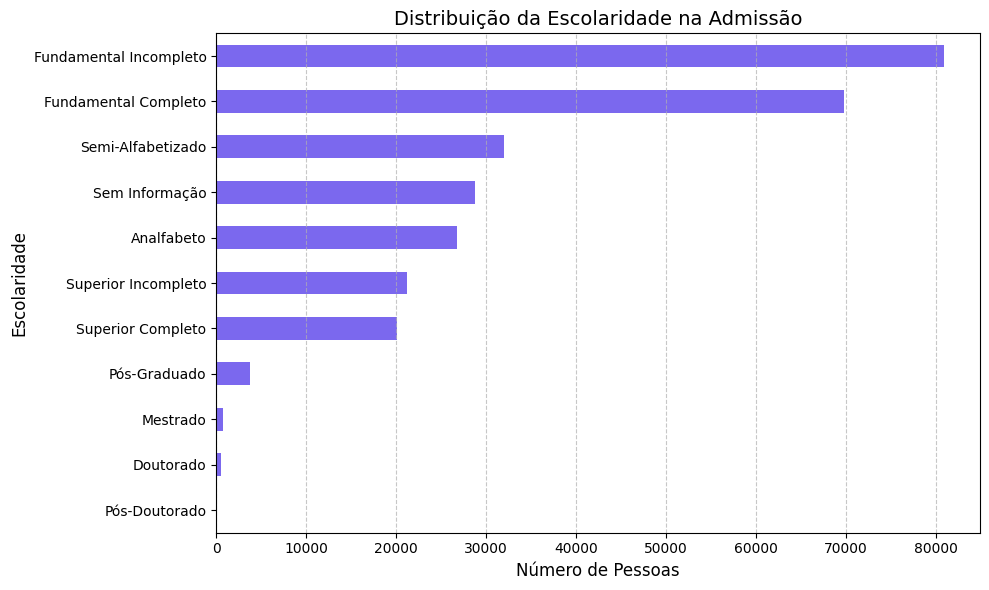

In [122]:
# Criar gráfico de barras horizontal
plt.figure(figsize=(10, 6))
escolaridade_counts.plot(kind='barh', color='mediumslateblue')

# Títulos e rótulos
plt.title('Distribuição da Escolaridade na Admissão', fontsize=14)
plt.xlabel('Número de Pessoas', fontsize=12)
plt.ylabel('Escolaridade', fontsize=12)
plt.gca().invert_yaxis()  # Coloca a maior categoria no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [92]:
print(df['instituicao'].value_counts())

instituicao
DEPEN    247054
APAC      37573
Name: count, dtype: int64


In [93]:
# Contagem das instituições
instituicoes = df['instituicao'].value_counts()


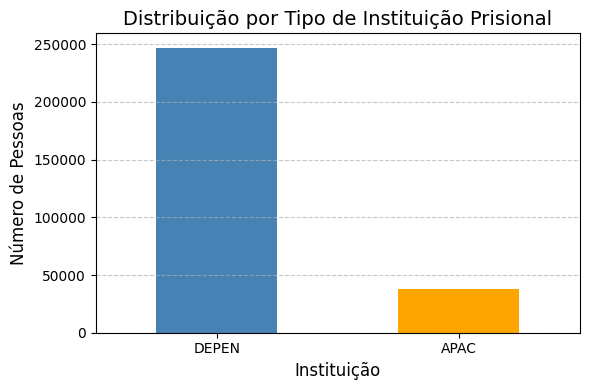

In [94]:
# Gráfico de barras
plt.figure(figsize=(6, 4))
instituicoes.plot(kind='bar', color=['steelblue', 'orange'])

# Títulos e rótulos
plt.title('Distribuição por Tipo de Instituição Prisional', fontsize=14)
plt.xlabel('Instituição', fontsize=12)
plt.ylabel('Número de Pessoas', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [95]:
#Cruzando informações:
tabela_cruzada = df.groupby(['instituicao', 'escolaridade_na_admissao']).size().unstack().fillna(0)
tabela_cruzada

escolaridade_na_admissao,Analfabeto,Doutorado,Fundamental Completo,Fundamental Incompleto,Mestrado,Pós-Doutorado,Pós-Graduado,Sem Informação,Semi-Alfabetizado,Superior Completo,Superior Incompleto
instituicao,,,,,,,,,,,
APAC,3367.0,96.0,9352.0,10883.0,96.0,0.0,409.0,3289.0,4286.0,2881.0,2914.0
DEPEN,23446.0,435.0,60403.0,70003.0,615.0,1.0,3375.0,25488.0,27703.0,17265.0,18320.0


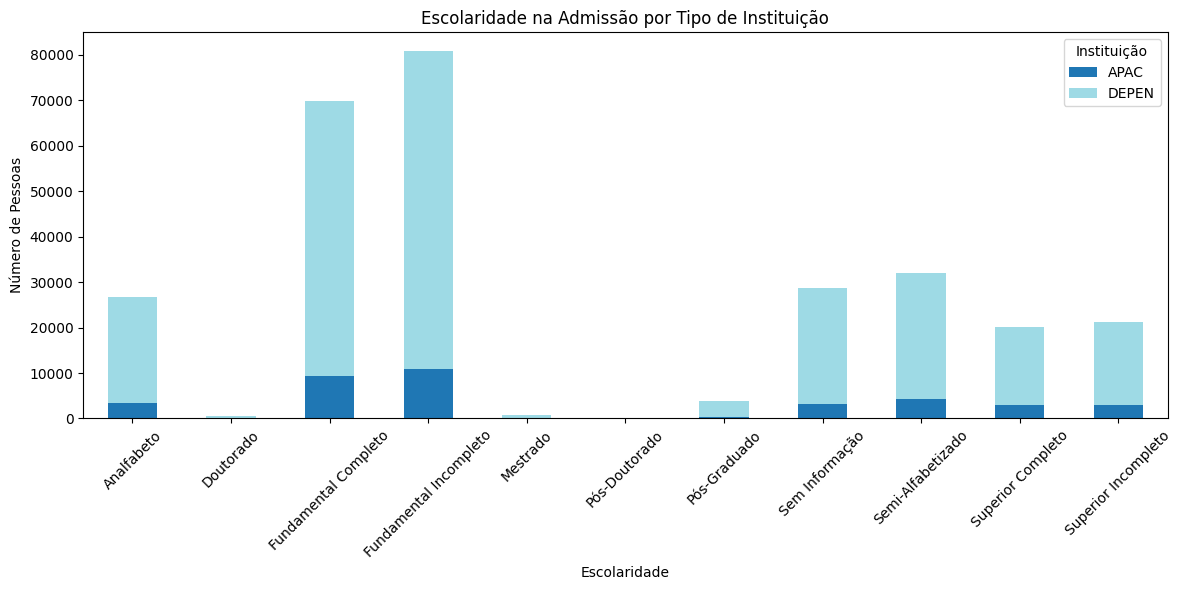

In [96]:
#Gráfico com as informações cruzadas:
tabela_cruzada.T.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')

plt.title('Escolaridade na Admissão por Tipo de Instituição')
plt.xlabel('Escolaridade')
plt.ylabel('Número de Pessoas')
plt.legend(title='Instituição')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insight
Observa-se que os níveis mais baixos de escolaridade concentram a maior parte da população prisional,
o que sugere uma possível relação entre baixa escolaridade e vulnerabilidade social.


## Distribuição da população prisional por sexo

Nesta etapa, analiso a composição da população prisional por sexo,
com o objetivo de identificar a proporção entre homens e mulheres
no sistema prisional de Minas Gerais ao longo do período analisado.


In [123]:
sexo_total = df.groupby('sexo_na_admissao')['contagem_ipl'].sum()

percentual_sexo = round(
    sexo_total / sexo_total.sum() * 100,
    2
)

percentual_sexo


,contagem_ipl
sexo_na_admissao,
Feminino,4.22
Masculino,95.78


<Axes: title={'center': 'Distribuição da População Prisional por Sexo'}, xlabel='sexo_na_admissao'>

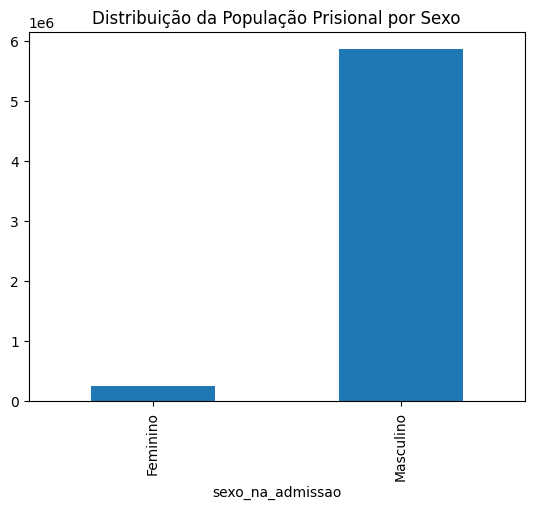

In [98]:
df_sexo = df.groupby('sexo_na_admissao')['contagem_ipl'].sum()
df_sexo.plot(kind='bar', title='Distribuição da População Prisional por Sexo')

In [99]:
sexo_ano = pd.crosstab(df['ANO'], df['sexo_na_admissao'], normalize='index') * 100
sexo_ano

sexo_na_admissao,Feminino,Masculino
ANO,,
2017,27.183178,72.816822
2018,27.861621,72.138379
2019,26.723488,73.276512
2020,24.185640,75.814360
2021,21.723116,78.276884
2022,18.540146,81.459854
2023,23.338277,76.661723
2024,16.801549,83.198451


In [108]:
percentual_masculino = round(
    df['sexo_na_admissao'].value_counts(normalize=True)['Masculino'] * 100,
    2
)

percentual_feminino = round(
    df['sexo_na_admissao'].value_counts(normalize=True)['Feminino'] * 100,
    2
)

percentual_masculino, percentual_feminino


(np.float64(76.15), np.float64(23.85))

### Insight

Os dados indicam que a população prisional é majoritariamente composta
por pessoas do sexo masculino, enquanto a participação feminina é
significativamente menor durante todo o período analisado.

Essa diferença sugere uma forte desigualdade de gênero no sistema prisional,
o que é consistente com dados nacionais e internacionais.


In [101]:
#Ranking de unidades com percentual acumulado:

ranking_unidades = df['nome_estab_prisional'].value_counts().reset_index()
ranking_unidades.columns = ['Unidade', 'Total']

ranking_unidades['Percentual'] = ranking_unidades['Total'] / ranking_unidades['Total'].sum() * 100
ranking_unidades['Percentual_Acumulado'] = ranking_unidades['Percentual'].cumsum()

ranking_unidades.head(10)

,Unidade,Total,Percentual,Percentual_Acumulado
0,Penitenciária Prof. Aluízio Ignácio de Oliveira,2267,0.796481,0.796481
1,Presídio Professor Jacy de Assis,2233,0.784536,1.581017
2,Penitenciária de Três Corações,2223,0.781022,2.362039
3,Presídio de Teófilo Otoni,2153,0.756429,3.118467
4,Presídio Alvorada,2087,0.733240,3.851708
5,Penitenciária José Edson Cavalieri,2064,0.725160,4.576867
6,Presídio de Floramar,2058,0.723052,5.299919
7,Complexo Penitenciário Doutor Pio Canedo,2003,0.703728,6.003647
8,Presídio de Governador Valadares,1974,0.693539,6.697186
9,Presidio de Alfenas,1933,0.679134,7.376321


In [107]:
#Análise regional proporcional
regiao_percentual = df['risp'].value_counts(normalize=True) * 100
regiao_ano = pd.crosstab(df['ANO'], df['risp'], normalize='index') * 100

regiao_percentual

,proportion
risp,
12ª RISP - Ipatinga,8.731076
04ª RISP - Juiz de Fora,8.007322
07ª RISP - Divinópolis,7.810924
11ª RISP - Montes Claros,6.773778
18ª RISP - Poços de Caldas,6.435440
15ª RISP - Teófilo Otoni,6.362011
06ª RISP - Lavras,5.793547
13ª RISP - Barbacena,5.344890
02ª RISP - Contagem,5.215247


In [105]:
indicadores = {
    "Total de Registros Após Limpeza": len(df),
    "Percentual Masculino": (df['sexo_na_admissao'].value_counts(normalize=True)['Masculino'] * 100),
    "Escolaridade Mais Frequente": df['escolaridade_na_admissao'].value_counts().idxmax(),
    "Unidade com Maior Número de Admissões": df['nome_estab_prisional'].value_counts().idxmax()
}

indicadores

{'Total de Registros Após Limpeza': 284627,
 'Percentual Masculino': np.float64(76.15054088333152),
 'Escolaridade Mais Frequente': 'Fundamental Incompleto',
 'Unidade com Maior Número de Admissões': 'Penitenciária Prof. Aluízio Ignácio de Oliveira'}

#Conclusão
A análise da população prisional admitida em Minas Gerais entre 2017 e 2024 foi conduzida a partir de uma base originalmente composta por 328.773 registros, reduzida para 284.627 após remoção de duplicidades e padronização das variáveis.

Para garantir consistência metodológica, as análises quantitativas foram realizadas utilizando a soma da variável contagem_ipl, evitando distorções decorrentes de simples contagem de registros.


**Evolução Temporal **

Considerando apenas anos completos (2017–2023), observa-se variação anual nas admissões, com crescimento relevante entre 2017 e 2018, seguida de oscilações negativas e positivas nos anos subsequentes. A exclusão de 2024 da análise de crescimento foi necessária por se tratar de ano com dados parciais até junho, o que inviabiliza comparação proporcional com anos completos.

Esse comportamento indica flutuações estruturais no volume de admissões ao longo do período, possivelmente influenciadas por fatores institucionais, legislativos ou contextos socioeconômicos.

**Distribuição por Sexo**

A análise baseada na soma de admissões revela forte predominância masculina no sistema prisional estadual.

-Masculino: 95,78%

-Feminino: 4,22%

Essa concentração se mantém estável ao longo do período analisado e caracteriza padrão demográfico estrutural do sistema prisional mineiro.

**Escolaridade**

A categoria “Fundamental Incompleto” representa 67,62% do total de admissões no período, evidenciando elevada concentração nos níveis mais baixos de escolarização formal.

Esse padrão se mantém ao longo dos anos analisados, sugerindo associação estrutural entre baixa escolaridade e ingresso no sistema prisional. Ressalta-se que a análise é descritiva e não permite inferência causal.

**Instituições e Centralização**

A maior parte das admissões ocorre em unidades administradas pelo DEPEN, indicando predominância desse modelo de gestão no sistema prisional estadual. Além disso, o ranking das unidades demonstra concentração significativa das admissões em determinados estabelecimentos, sugerindo centralização operacional.

**Síntese**

De forma consolidada, os dados indicam:

-Predominância masculina expressiva e estável

-Forte concentração em níveis educacionais mais baixos

-Oscilações anuais no volume de admissões

-Centralização das admissões em unidades específicas

A estrutura demográfica e educacional do sistema prisional mineiro mantém-se relativamente estável ao longo do período analisado.

**Limitações**

-Ausência de variáveis socioeconômicas complementares

-Inexistência de dados sobre reincidência ou tempo de permanência

-Análise exclusivamente exploratória e descritiva

-Não aplicação de modelos inferenciais ou preditivos